# Project Name: Banglore House Price Prediction

## Description

What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor — the price?


Now with the lingering impact of demonetization, the enforcement of the Real Estate (Regulation and Development) Act (RERA), and the lack of trust in property developers in the city, housing units sold across India in 2017 dropped by 7 percent. In fact, the property prices in Bengaluru fell by almost 5 percent in the second half of 2017, said a study published by property consultancy Knight Frank

.
For example, for a potential homeowner, over 9,000 apartment projects and flats for sale are available in the range of ₹42-52 lakh, followed by over 7,100 apartments that are in the ₹52-62 lakh budget segment, says a report by property website Makaan. According to the study, there are over 5,000 projects in the ₹15-25 lakh budget segment followed by those in the ₹34-43 lakh budget category.


Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.

## Objective

By analyzing these Bangalore house data we will determine the approximate price for the houses

## Data Description

Columns:
- area_type
- availability
- location
- size
- society
- total_sqft
- bath
- balcony
- price

#### kaggle dataset [link](https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data)

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib 
matplotlib.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [2]:
df = pd.read_csv('data/Bengaluru_House_Data.csv')
df.head(15)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
print(f'Number of Rows = {df.shape[0]}')
print(f'Number of Columns = {df.shape[1]}')

Number of Rows = 13320
Number of Columns = 9


### Displaying Column names with their datatypes

In [4]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

area_type, availability, location, society these 3 are definately categorical features but size, total_sqrt should not be object type. Need to look into those features

# Exploratory Data Analysis

### checking how values are missing

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Data set is containing a lot of missing values. Before doing EDA we need to clean out dataset then only things can go ahead.

## Baisic Data Cleaning

Because society having 41% empty values, so we are droping socirty column

In [6]:
df = df.drop(['society'], axis=1)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


deleting those rows where location and size attribute is missing. location feature is missing 1 value and size attribute is missing 16. Because these numbers are really low compared to 13K, thats why droping them

In [7]:
df = df.dropna(subset=['location', 'size'])

Converting size attribute values to int from string

In [8]:
df['size'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200,2.0,1.0,51.00


Lets make total_sqrt attribute to float

In [9]:
df['total_sqft'].apply(float)

ValueError: could not convert string to float: '2100 - 2850'

we are getting error(ValueError). Why is that ?
It turns out there are some values which can not simply cast to float like '2100 - 2850'

### Finding which rows are giving error for total_sqrt

In [10]:
def is_float(x):
    try:
        float(x)
    except ValueError:
        return False
    return True


filt = df['total_sqft'].apply(is_float)
print(f'How many rows of total_sqrt can not be converted to float ? = {df[filt].shape[0]}')
df[~filt].head(10)

How many rows of total_sqrt can not be converted to float ? = 13064


,area_type,availability,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4,2957 - 3450,NaN,NaN,224.500
122,Super built-up Area,18-Mar,Hebbal,4,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,18-Dec,Sarjapur,2,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,Ready To Move,KR Puram,2,1015 - 1540,2.0,0.0,56.800
224,Super built-up Area,19-Dec,Devanahalli,3,1520 - 1740,NaN,NaN,74.820
410,Super built-up Area,Ready To Move,Kengeri,1,34.46Sq. Meter,1.0,0.0,18.500
549,Super built-up Area,18-Sep,Hennur Road,2,1195 - 1440,2.0,0.0,63.770


In [11]:
arr = [12.2, 15.7, 5.9, 82.4]
# arr2 = []
# for ele in arr:
#     arr2.append(int(ele))
# arr2

arr2 = list(map(int, arr))
arr2
# map, reduce, filter

[12, 15, 5, 82]

[more](https://www.analyticsvidhya.com/blog/2021/07/python-most-powerful-functions-map-filter-and-reduce-in-5-minutes/)

In [12]:
def convert_total_sqft(x):
    token = x.split('-')
    if len(token) == 2:
        start, end = map(float, token)
        return (start + end) / 2
    
    try:
        return float(x)
    except ValueError:
        return np.nan
    

df['total_sqft'].apply(convert_total_sqft).isnull().sum()

46

There are 46 values of total_sqrt which can not be convert to numerical format. So droping thoese

In [13]:
df['total_sqft'] = df['total_sqft'].apply(convert_total_sqft)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,1.0,51.00


Now we are droping those 46 rows

In [14]:
df = df.dropna(subset=['total_sqft'])
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,1.0,51.00


### Empty Values of bath and balcony features are beeing filled by their median value

In [15]:
def fill_median(df, col_names):
    for col in col_names:
        median_value = df[col].median()
        df.loc[:, col] = df[col].fillna(median_value)


fill_median(df, ['bath', 'balcony'])

In [16]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

now there are no more missing values are present in the dataset.

### How many different types of area are there ?

In [17]:
df['area_type'].value_counts()

Super built-up  Area    8778
Built-up  Area          2402
Plot  Area              1991
Carpet  Area              86
Name: area_type, dtype: int64

### different types of 'availability' in dataset

In [18]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       '19-May', '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct',
       '21-Jan', '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul',
       '21-Nov', '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep',
       '21-Aug', '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun',
       '17-Feb', '20-Nov', '20-Jul', '16-Sep', '15-Oct', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [19]:
# making all non 'ready to move' to 'not ready to move'
def clean_availability(x):
    if x != 'Ready To Move':
        return 'Not Ready To Move'
    return x
    

df['availability'] = df['availability'].apply(clean_availability)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Not Ready To Move,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,1.0,51.00


In [20]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

Done processing on all empty/missing values. At first we had 13320 rows now we left with 13257 rows. Total of 63 rows removed from dataset which is not that much for 13K

### Getting basic statistics on numerical features

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
size,13257.0,2.802670,1.292117,1.0,2.0,3.0,3.0,43.0
total_sqft,13257.0,1558.809175,1238.478935,1.0,1100.0,1275.0,1680.0,52272.0
bath,13257.0,2.688165,1.336799,1.0,2.0,2.0,3.0,40.0
balcony,13257.0,1.604058,0.802958,0.0,1.0,2.0,2.0,3.0
price,13257.0,112.471981,149.092716,8.0,50.0,72.0,120.0,3600.0


### Numerical and Categorial features

In [22]:
numerical_cols = [col for col in df.columns if df[col].dtype != 'O']
categorical_cols = [col for col in df.columns if df[col].dtype == 'O']

In [23]:
print(f'numerical colsumns are = {numerical_cols}')
print(f'categorical colsumns are = {categorical_cols}')

numerical colsumns are = ['size', 'total_sqft', 'bath', 'balcony', 'price']
categorical colsumns are = ['area_type', 'availability', 'location']


In [24]:
continuous_cols = [col for col in numerical_cols if df[col].nunique() >= 25]
discrete_cols = [col for col in numerical_cols if df[col].nunique() < 25]

In [25]:
print(f'continuous colsumns are = {continuous_cols}')
print(f'discrete colsumns are = {discrete_cols}')

continuous colsumns are = ['total_sqft', 'price']
discrete colsumns are = ['size', 'bath', 'balcony']


### Distribution of the Numerical Variables

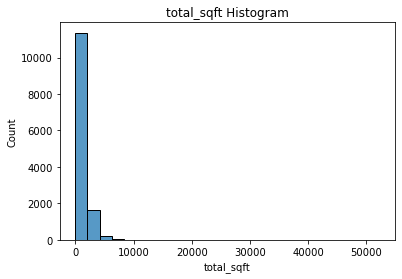

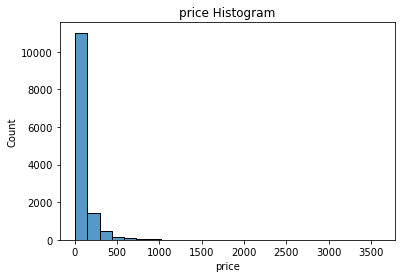

In [26]:
for col in continuous_cols:
    sns.histplot(df[col], bins = 25)
    plt.title(f'{col} Histogram')
    plt.show()

### Categorical Variables Plots

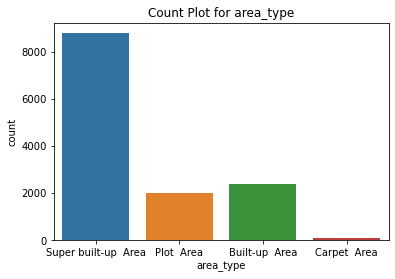

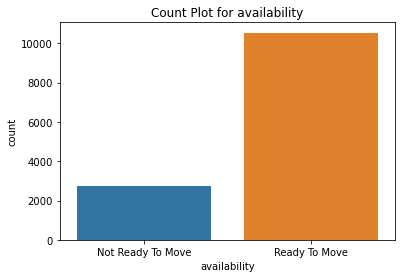

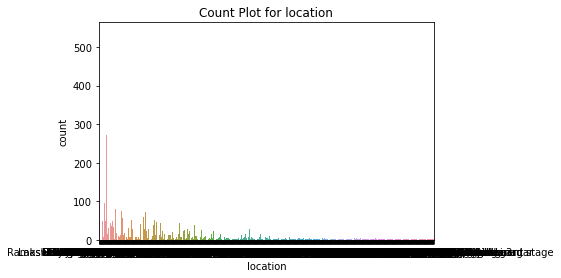

In [27]:
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot for {col}')
    plt.show()

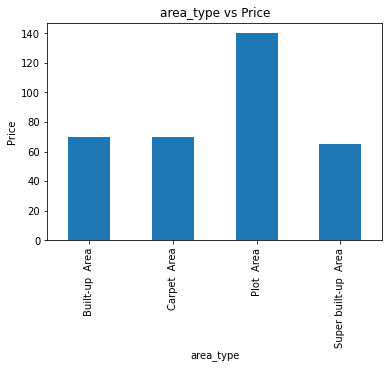

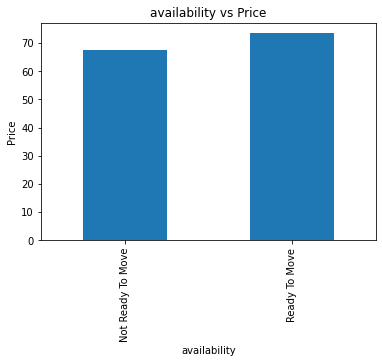

In [28]:
for col in categorical_cols:
    if col != 'location':
        df.groupby(col)['price'].median().plot(kind='bar')

        plt.title(f"{col} vs Price")
        plt.xlabel(col)
        plt.ylabel('Price')

        plt.show()

observation

### Finding Outliers

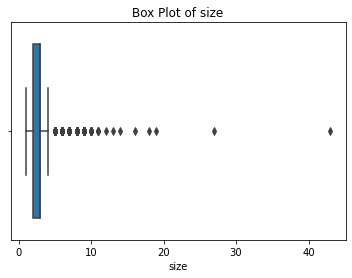

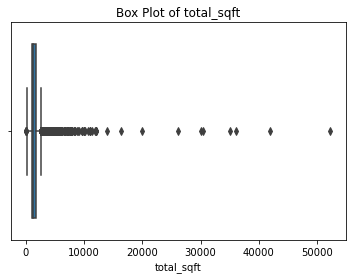

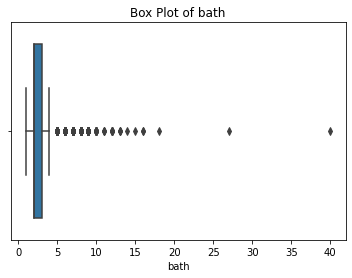

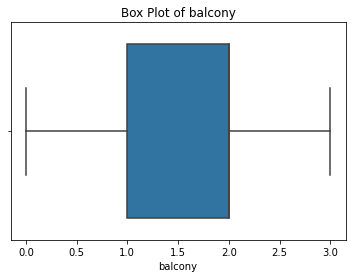

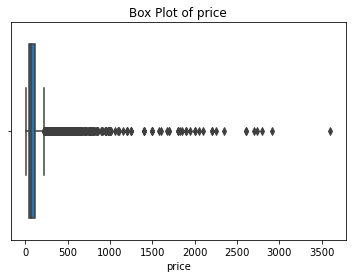

In [29]:
for col in numerical_cols:
    sns.boxplot(x=col, data=df)
    plt.title(f'Box Plot of {col}')
    plt.show()

### checking for multi-colinearity

In [30]:
df.corr()

,size,total_sqft,bath,balcony,price
size,1.000000,0.348146,0.895277,0.194296,0.397963
total_sqft,0.348146,1.000000,0.389850,0.154288,0.575632
bath,0.895277,0.389850,1.000000,0.207759,0.454334
balcony,0.194296,0.154288,0.207759,1.000000,0.125034
price,0.397963,0.575632,0.454334,0.125034,1.000000


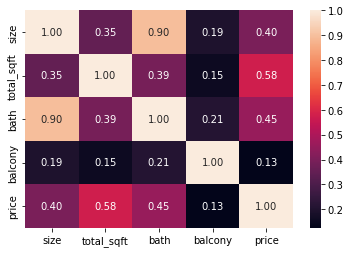

In [31]:
sns.heatmap(df.corr(), annot=True, fmt='0.2f')
plt.show()

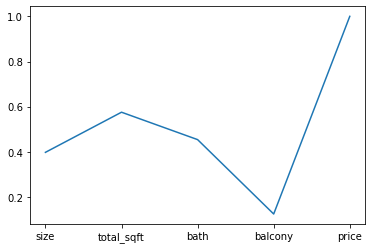

In [32]:
plt.plot(df.corr()['price'])

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif


calc_vif(df[numerical_cols][:-1])

,variables,VIF
0,size,26.711641
1,total_sqft,3.863012
2,bath,27.226212
3,balcony,3.774566
4,price,2.525140


In [34]:
df = df.drop(columns=['bath'])
numerical_cols.remove('bath')

In [35]:
calc_vif(df[numerical_cols][:-1])

,variables,VIF
0,size,4.858969
1,total_sqft,3.839970
2,balcony,3.750187
3,price,2.451206


# Feature Engineering

### Outlier Removal

In [36]:
def remove_outiers(col):
    print(f'Removing Outliers From {col}')
    print(f"{'-' * 50}")
    plt.figure(figsize=(16, 12))

    plt.subplot(2, 2, 1)
    sns.histplot(df[col], bins=50)
    plt.title('Before removing outliers, histogram')


    plt.subplot(2, 2, 2)
    sns.boxplot(x = df[col])
    plt.title('Before removing outliers, boxplot')


    # ================================================================
    # removing outliers from non-normal distribution
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_boundary = df[col].quantile(0.25) - (IQR * 1.75)
    uppper_boundary = df[col].quantile(0.75) + (IQR * 1.75)

    filt_left = df[col] <= lower_boundary
    filt_right = df[col] >= uppper_boundary

    df.loc[filt_left , col] = lower_boundary
    df.loc[filt_right , col] = uppper_boundary
    # ================================================================

    plt.subplot(2, 2, 3)
    sns.histplot(df[col], bins=50)
    plt.title('After removing outliers, histogram')

    plt.subplot(2, 2, 4)
    sns.boxplot(x = df[col])
    plt.title('After removing outliers, boxplot')
    
    plt.tight_layout()
    plt.show()
    print(f"{'-' * 50}")

Removing Outliers From size
--------------------------------------------------


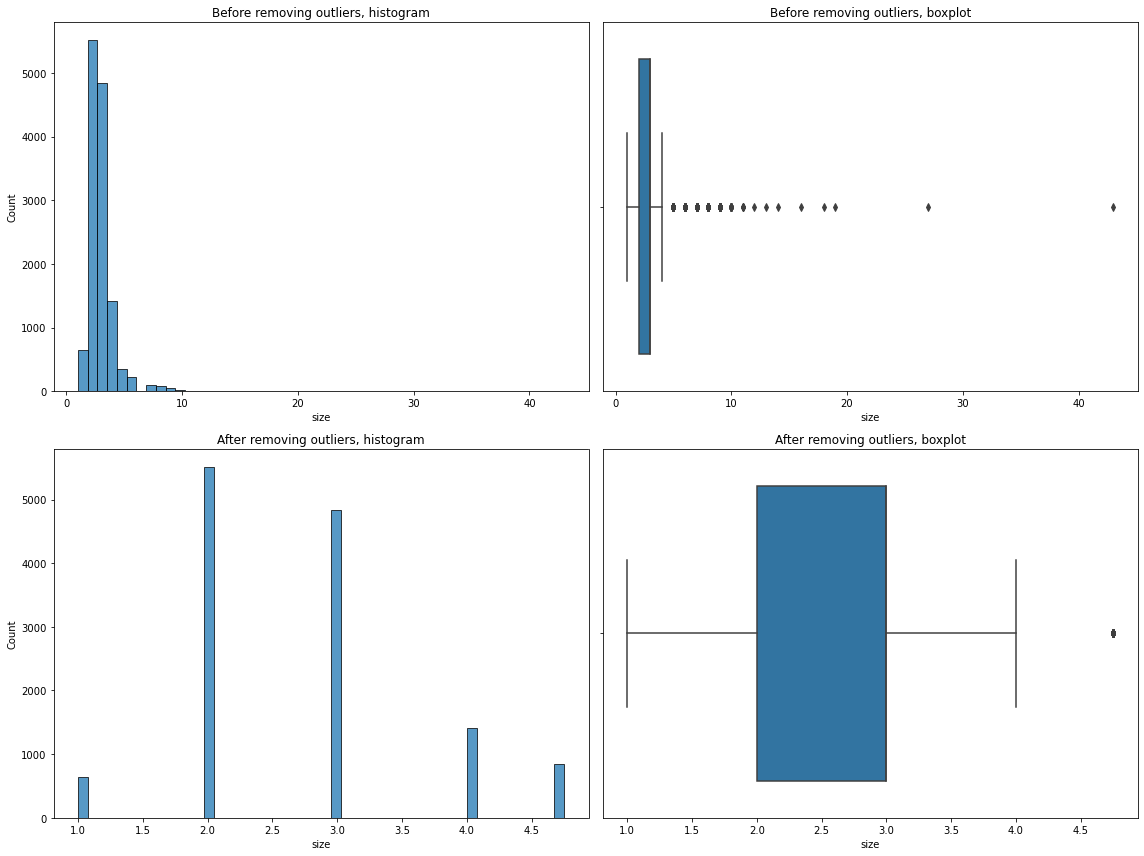

--------------------------------------------------
Removing Outliers From total_sqft
--------------------------------------------------


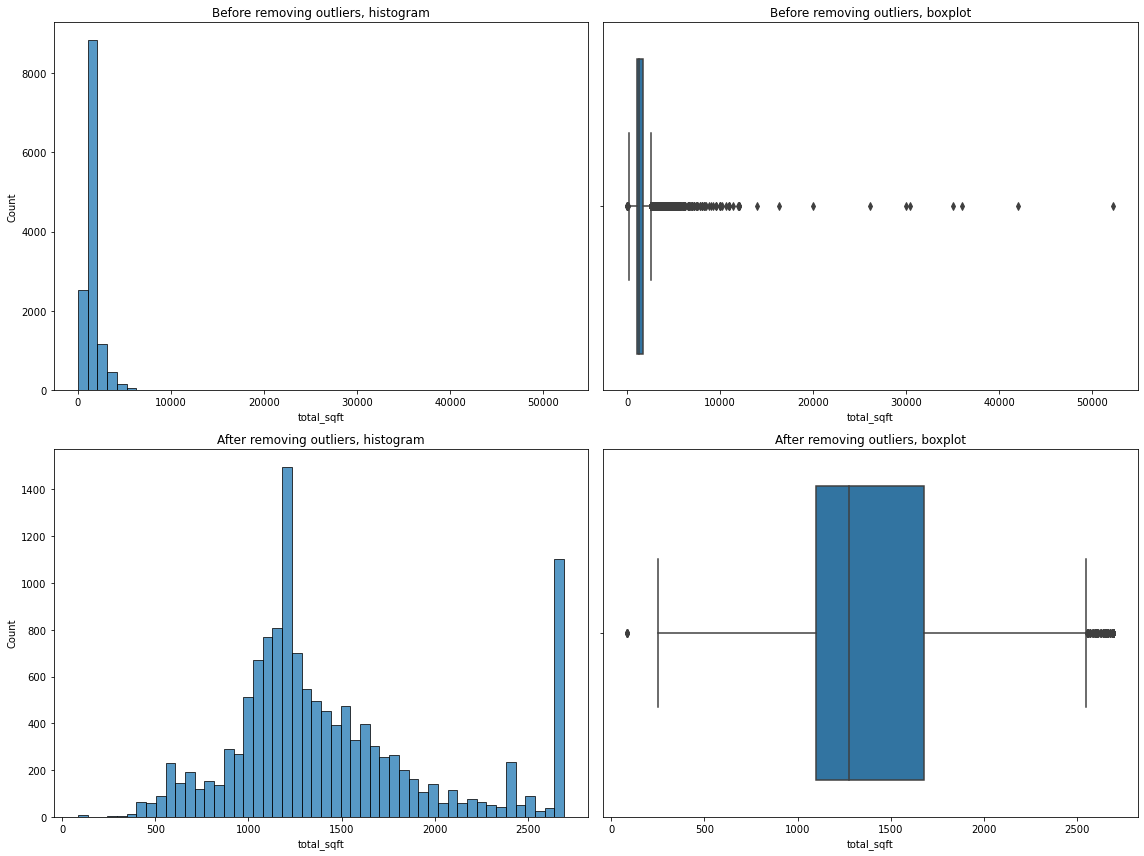

--------------------------------------------------
Removing Outliers From balcony
--------------------------------------------------


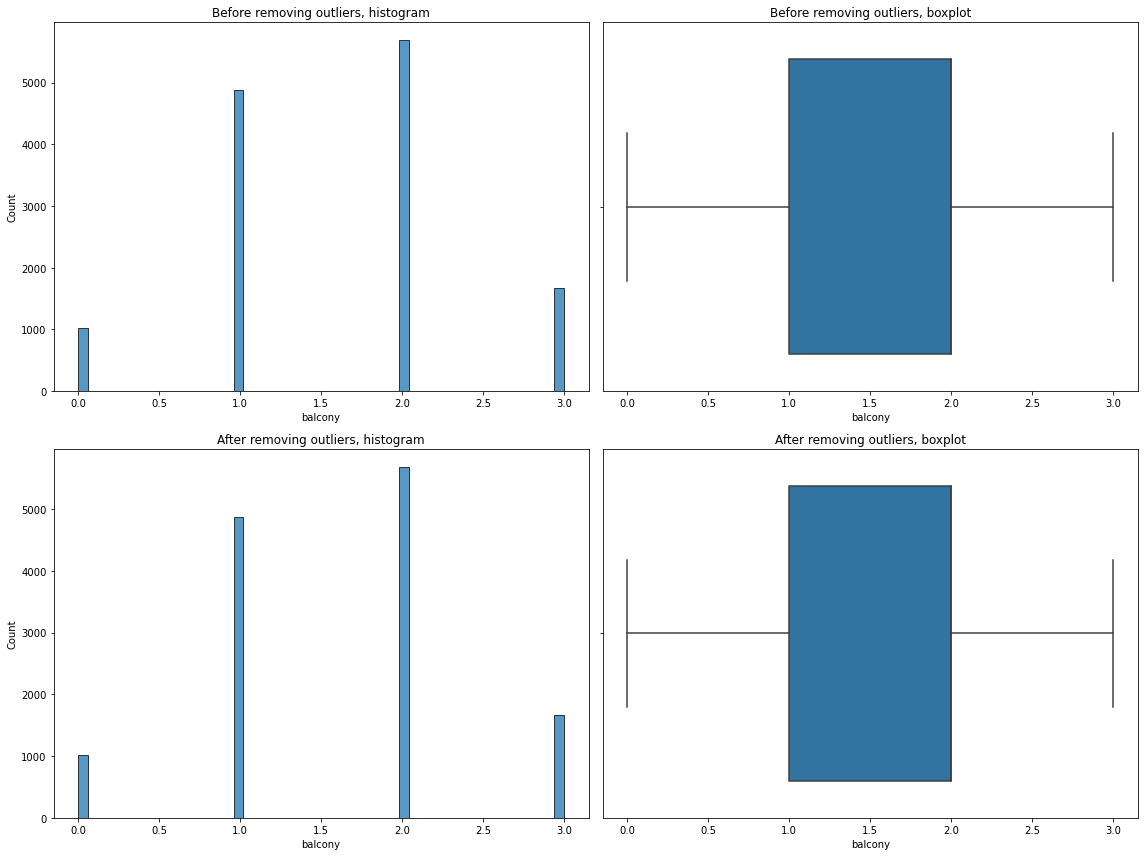

--------------------------------------------------
Removing Outliers From price
--------------------------------------------------


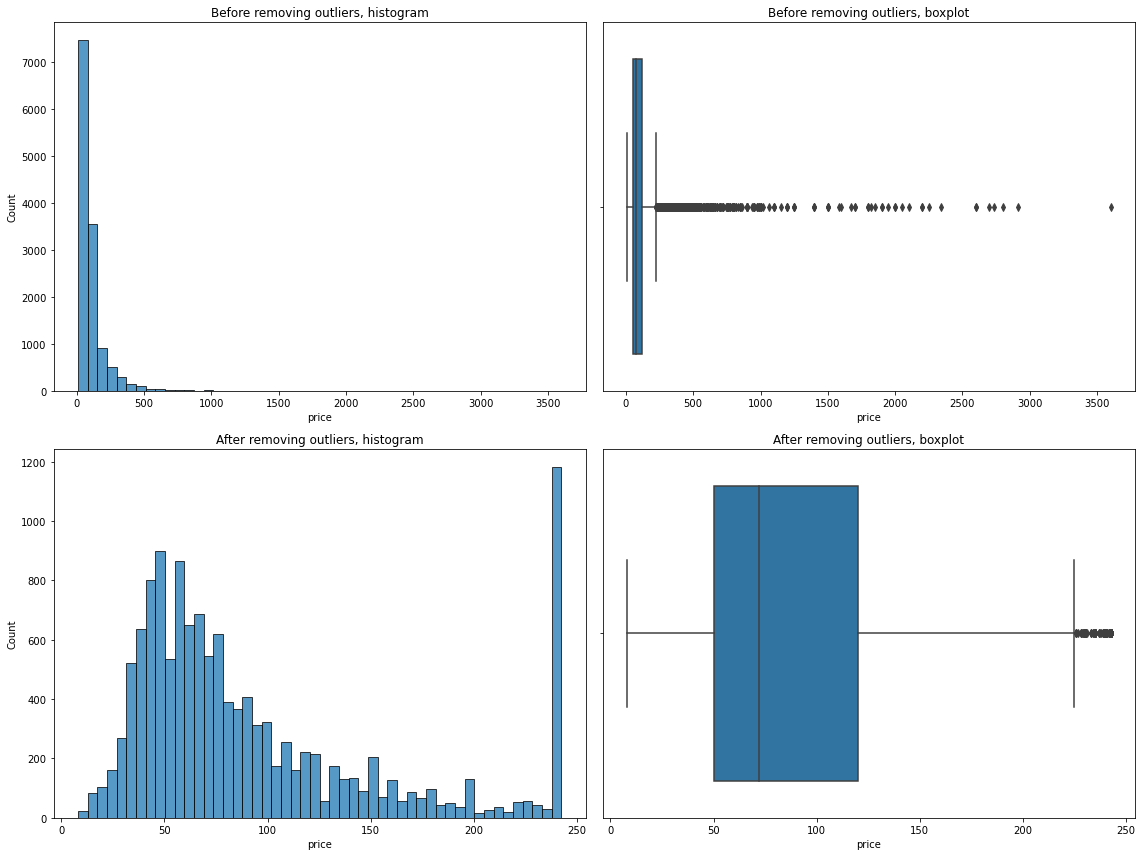

--------------------------------------------------


In [37]:
for col in numerical_cols:
    remove_outiers(col)

In [38]:
df['price_per_sqrt'] = df['price'] / df['total_sqft']

### Categorical Encodings

In [39]:
df.location = df.location.apply(lambda x: x.strip())
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               538
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           271
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [40]:
len(location_stats[location_stats <= 10])

1047

In [41]:
locationlessthan10 = location_stats[location_stats<=10]
locationlessthan10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [42]:
df.location = df.location.apply(lambda x: 'other' if x in locationlessthan10 else x)
len(df.location.unique())

241

In [43]:
1287 - 1047 + 1

241

In [44]:
['pen', 'pencil', 'pencil', 'scale', 'pencil', 'pen'] = 3

[1, 0] 
[0, 1]
[0, 1]
[0, 0]
[0, 1]
[1, 0]

SyntaxError: cannot assign to literal (Temp/ipykernel_3984/3018602260.py, line 1)

In [45]:
dummies = pd.get_dummies(df[categorical_cols])
dummies.head()

,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Not Ready To Move,availability_Ready To Move,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
dummies = dummies.drop(columns=['location_other',
                                           'availability_Not Ready To Move',
                                           'area_type_Super built-up  Area'])

In [47]:
df = pd.concat([df, dummies], axis='columns')
df.head()

,area_type,availability,location,size,total_sqft,balcony,price,price_per_sqrt,area_type_Built-up Area,area_type_Carpet Area,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,Super built-up Area,Not Ready To Move,Electronic City Phase II,2.0,1056.0,1.0,39.07,0.036998,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,3.0,120.00,0.046154,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,3.0,62.00,0.043056,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,1.0,95.00,0.062459,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,1.0,51.00,0.042500,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df = df.drop(columns=['area_type', 'availability', 'location'], axis='columns')
df.head()

,size,total_sqft,balcony,price,price_per_sqrt,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,availability_Ready To Move,location_1st Block Jayanagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2.0,1056.0,1.0,39.07,0.036998,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,2600.0,3.0,120.00,0.046154,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1440.0,3.0,62.00,0.043056,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1521.0,1.0,95.00,0.062459,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1200.0,1.0,51.00,0.042500,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X = df.drop(['price'], axis='columns')
X.head()

,size,total_sqft,balcony,price_per_sqrt,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,availability_Ready To Move,location_1st Block Jayanagar,location_1st Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2.0,1056.0,1.0,0.036998,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,2600.0,3.0,0.046154,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1440.0,3.0,0.043056,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1521.0,1.0,0.062459,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1200.0,1.0,0.042500,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
y = df['price']
y

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    242.50
13317     60.00
13318    242.50
13319     17.00
Name: price, Length: 13257, dtype: float64

### Scaling Values

y_mean = y.mean()

y_std = y.std()

y_copy = (y - y_mean) / y_std

y_copy

normalization :
x = (x - x_mean) / x_std


min max scaling : 
x = (x - x_min) / (x_max - x_min)


robust scaling : 
x = (x - q1(x)) / (q3(x) - q1(x))

[more](https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/)

In [51]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = ss.fit_transform(X)

In [52]:
y_np = np.array(y).reshape(-1, 1)
y_np_mod = ss.fit_transform(y_np)
y_np_mod = y_np_mod.flatten()

In [53]:
y_mean = y.mean()
y_std = y.std()
y = (y - y_mean) / y_std

In [54]:
y == y_np_mod

0        False
1        False
2        False
3        False
4        False
         ...  
13315    False
13316    False
13317    False
13318    False
13319    False
Name: price, Length: 13257, dtype: bool

In [55]:
y = y_np_mod

## Train Test Split

In [56]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y)

## Model Building

___
In this project we will aplly these models and pick best one

> 1. Linear Regression
> 2. Robust Regression
> 3. Ridge Regression
> 4. LASSO Regression
> 5. Elastic Net
> 6. Polynomial Regression
> 7. Random Forest Regressor
> 8. Support Vector Regressor

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


If these loss functions or cost functions are closer or equal to 0 is better.
For R2_Score maximum value is 1 which is best for any model can be and 0 is worst.

In [57]:
---------- 100%

------- -- (Train=80% Test=20%) (75% 25%)
k = 5
[-- -- -- --] --
-- [-- -- -- --]
--] -- [-- -- --
-- -- ]-- [-- --
-- -- --] -- [--

SyntaxError: invalid syntax (Temp/ipykernel_3984/2436542296.py, line 1)

In [58]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score


results = pd.DataFrame(columns=['Model Name', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'CV-score'])

def cross_val(model, X, y):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()


def print_evaluate(y_actual, y_pred):  
    mae = metrics.mean_absolute_error(y_actual, y_pred)
    print('MAE:', mae)
    
    mse = metrics.mean_squared_error(y_actual, y_pred)
    print('MSE:', mse)
    
    rmse = np.sqrt(metrics.mean_squared_error(y_actual, y_pred))
    print('RMSE:', rmse)
    
    r2_square = metrics.r2_score(y_actual, y_pred)
    print('R2 Square', r2_square)
    
    print('_' * 50)
    
    
def evaluate(y_actual, y_pred):
    mae = metrics.mean_absolute_error(y_actual, y_pred)
    mse = metrics.mean_squared_error(y_actual, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_actual, y_pred))
    r2_square = metrics.r2_score(y_actual, y_pred)
    
    return (mae, mse, rmse, r2_square)

def addToResults(name, model, X, y, X_test, y_test):
    global results
    
    y_pred = model.predict(X_test)
    
    MAE, MSE, RSME, R2 = evaluate(y_test, y_pred)
    cv = cross_val(model, X_test, y_test)
    
    result_dict = {'Model Name':name, 'MAE':MAE, 'MSE':MSE, 'RMSE':RSME, 'R2 Square':R2, 'CV-score':cv}
    
    results=results.append(result_dict, ignore_index = True)

### importing all regression models

In [ ]:
y = mx + c

y = m1x2 + m2x + c (d=2)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

## LinearRegression with default parameters

In [60]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:')
print('-' * 50)

print_evaluate(y_test, test_pred)

print('Train set evaluation:')
print('-' * 50)

print_evaluate(y_train, train_pred)

addToResults('Linear Regression default', lin_reg, X, y, X_test, y_test)

Test set evaluation:
--------------------------------------------------
MAE: 0.264102249096027
MSE: 0.14359282217471908
RMSE: 0.3789364355333478
R2 Square 0.8548605561746028
__________________________________________________
Train set evaluation:
--------------------------------------------------
MAE: 0.255272954792446
MSE: 0.161617822802117
RMSE: 0.4020171921723212
R2 Square 0.8389533614013727
__________________________________________________


**Underfit**

Train = 5  MSE = 0.01

Test  = 4

 - add more data
 - add new features m -> 50 + m
 - use better model


    
**Overfit**

Train = 0.01  MSE = 0.01

Test  = 2

 - regularization [Ridge, Lasso, ElasticNet]  [l2, l1, l1-l2]
 - better model

## Ridge Regression with default parameters

In [61]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

test_pred = ridge_reg.predict(X_test)
train_pred = ridge_reg.predict(X_train)

print('Test set evaluation:')
print('-' * 50)

print_evaluate(y_test, test_pred)

print('Train set evaluation:')
print('-' * 50)

print_evaluate(y_train, train_pred)

addToResults('Ridge Regression default', ridge_reg, X, y, X_test, y_test)

Test set evaluation:
--------------------------------------------------
MAE: 0.2641151966955737
MSE: 0.14360072677800795
RMSE: 0.37894686537561956
R2 Square 0.8548525664317477
__________________________________________________
Train set evaluation:
--------------------------------------------------
MAE: 0.25528706673845275
MSE: 0.16161783398265678
RMSE: 0.4020172060778702
R2 Square 0.8389533502603468
__________________________________________________


## Ridge Regression with optimized parameters

In [62]:
alpha = [0.001, 0.003, 0.01, 0.03, 0.06, 0.1, 0.3, 1, 3, 10, 90, 100, 900, 1000]
param_grid = dict(alpha=alpha)

grid = GridSearchCV(estimator=ridge_reg, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best Score:  0.8208696959173609
Best Params:  {'alpha': 100}


In [63]:
ridge_reg = Ridge(alpha= 0.100)
ridge_reg.fit(X_train, y_train)

test_pred = ridge_reg.predict(X_test)
train_pred = ridge_reg.predict(X_train)

print('Test set evaluation:')
print('-' * 50)

print_evaluate(y_test, test_pred)

print('Train set evaluation:')
print('-' * 50)

print_evaluate(y_train, train_pred)

addToResults('Ridge Regression optimisedV2', ridge_reg, X, y, X_test, y_test)

Test set evaluation:
--------------------------------------------------
MAE: 0.26410354434272443
MSE: 0.14359361195170045
RMSE: 0.37893747762883057
R2 Square 0.854859757891025
__________________________________________________
Train set evaluation:
--------------------------------------------------
MAE: 0.2552743663452858
MSE: 0.1616178229139899
RMSE: 0.4020171923114606
R2 Square 0.8389533612898952
__________________________________________________


## Lasso Regression with default parameters

In [64]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

test_pred = lasso_reg.predict(X_test)
train_pred = lasso_reg.predict(X_train)

print('Test set evaluation:')
print('-' * 50)

print_evaluate(y_test, test_pred)

print('Train set evaluation:')
print('-' * 50)

print_evaluate(y_train, train_pred)

addToResults('Lasso Regression default', lasso_reg, X, y, X_test, y_test)

Test set evaluation:
--------------------------------------------------
MAE: 0.7866516813373587
MSE: 0.9893695154094773
RMSE: 0.9946705562192325
R2 Square -2.5899829524611562e-05
__________________________________________________
Train set evaluation:
--------------------------------------------------
MAE: 0.7867340931268053
MSE: 1.0035467005611538
RMSE: 1.0017717806771929
R2 Square 0.0
__________________________________________________


## Lasso Regression with optimized parameters

In [65]:
alpha = [0.001, 0.003, 0.01, 0.03, 0.06, 0.1, 0.3, 1, 3, 10, 90, 100, 900, 1000]
param_grid = dict(alpha=alpha)

grid = GridSearchCV(estimator=lasso_reg, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best Score:  0.8201891677641889
Best Params:  {'alpha': 0.001}


In [66]:
lasso_reg = Lasso(alpha= 0.001)
lasso_reg.fit(X_train, y_train)

test_pred = lasso_reg.predict(X_test)
train_pred = lasso_reg.predict(X_train)

print('Test set evaluation:')
print('-' * 50)

print_evaluate(y_test, test_pred)

print('Train set evaluation:')
print('-' * 50)

print_evaluate(y_train, train_pred)

addToResults('Laso Regression optimised', ridge_reg, X, y, X_test, y_test)

Test set evaluation:
--------------------------------------------------
MAE: 0.26150209043760575
MSE: 0.14228216896251045
RMSE: 0.3772030871593053
R2 Square 0.856185326280705
__________________________________________________
Train set evaluation:
--------------------------------------------------
MAE: 0.2536073128535503
MSE: 0.16195339251072302
RMSE: 0.40243433316595023
R2 Square 0.8386189776517989
__________________________________________________


## Elastic Net with default parameters

In [67]:
model = ElasticNet(max_iter=2000)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:')
print('-' * 50)

print_evaluate(y_test, test_pred)

print('Train set evaluation:')
print('-' * 50)

print_evaluate(y_train, train_pred)

addToResults('Elastic Net default', model, X, y, X_test, y_test)

Test set evaluation:
--------------------------------------------------
MAE: 0.6728533377029967
MSE: 0.7296760507576338
RMSE: 0.8542107765403301
R2 Square 0.26246469304145414
__________________________________________________
Train set evaluation:
--------------------------------------------------
MAE: 0.6730474462560434
MSE: 0.741891704267828
RMSE: 0.8613313556743584
R2 Square 0.26073026411926425
__________________________________________________


## Elastic Net with optimized parameters

In [ ]:
alpha = [0.001, 0.003, 0.01, 0.03, 0.06, 0.1, 0.3, 1, 3, 10, 90, 100, 900, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

In [68]:
model = ElasticNet(max_iter=10000, alpha= 0.03, l1_ratio=0)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:')
print('-' * 50)

print_evaluate(y_test, test_pred)

print('Train set evaluation:')
print('-' * 50)

print_evaluate(y_train, train_pred)

addToResults('Elastic Net optimised', model, X, y, X_test, y_test)

Test set evaluation:
--------------------------------------------------
MAE: 0.2680517361290537
MSE: 0.14649346827230855
RMSE: 0.38274465152671766
R2 Square 0.851928667553971
__________________________________________________
Train set evaluation:
--------------------------------------------------
MAE: 0.2596919212493914
MSE: 0.16244436102566728
RMSE: 0.4030438698524855
R2 Square 0.8381297443010542
__________________________________________________


## Random Forest Regressor with default parameters

In [69]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:')
print('-' * 50)

print_evaluate(y_test, test_pred)

print('Train set evaluation:')
print('-' * 50)

print_evaluate(y_train, train_pred)

addToResults('Random Forest Regressor default', model, X, y, X_test, y_test)

Test set evaluation:
--------------------------------------------------
MAE: 0.008547621023073992
MSE: 0.0027823171959587803
RMSE: 0.052747674791963864
R2 Square 0.9971877147878887
__________________________________________________
Train set evaluation:
--------------------------------------------------
MAE: 0.002990215002976423
MSE: 0.00019531816253647372
RMSE: 0.013975627446969017
R2 Square 0.9998053721242597
__________________________________________________


In [71]:
from sklearn.model_selection import KFold


cv = KFold(n_splits=5)
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1,cv=cv)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Score:  0.7020703540759807
Best Params:  {'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}


In [72]:
model = RandomForestRegressor(bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:')
print('-' * 50)

print_evaluate(y_test, test_pred)

print('Train set evaluation:')
print('-' * 50)

print_evaluate(y_train, train_pred)

addToResults('Random Forest Regressor optimised', model, X, y, X_test, y_test)

Test set evaluation:
--------------------------------------------------
MAE: 0.3920200625052362
MSE: 0.27568619298740665
RMSE: 0.525058275801274
R2 Square 0.7213444229695067
__________________________________________________
Train set evaluation:
--------------------------------------------------
MAE: 0.3889615842001577
MSE: 0.2731545889790449
RMSE: 0.5226419318989292
R2 Square 0.7278107846637283
__________________________________________________


## Support Vector Regressor with default parameters

In [73]:
model = SVR()
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:')
print('-' * 50)

print_evaluate(y_test, test_pred)

print('Train set evaluation:')
print('-' * 50)

print_evaluate(y_train, train_pred)

addToResults('Support Vector Regressor default', model, X, y, X_test, y_test)

Test set evaluation:
--------------------------------------------------
MAE: 0.21320503683500935
MSE: 0.1660669498314186
RMSE: 0.40751312841602855
R2 Square 0.8321443622928124
__________________________________________________
Train set evaluation:
--------------------------------------------------
MAE: 0.18848993512546522
MSE: 0.12714270429903554
RMSE: 0.356570756371068
R2 Square 0.8733066391151094
__________________________________________________


### Polynomial Regression with default parameters

In [74]:
poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

model = LinearRegression(normalize=True)
model.fit(X_train_2_d,y_train)

test_pred = model.predict(X_test_2_d)
train_pred = model.predict(X_train_2_d)

print('Test set evaluation:')
print('-' * 50)

print_evaluate(y_test, test_pred)

print('Train set evaluation:')
print('-' * 50)

print_evaluate(y_train, train_pred)

addToResults('Polynomial Regression', model, X, y, X_test_2_d, y_test)

Test set evaluation:
--------------------------------------------------
MAE: 0.02563657647150766
MSE: 0.29972197867303124
RMSE: 0.5474687010898717
R2 Square 0.6970497506210989
__________________________________________________
Train set evaluation:
--------------------------------------------------
MAE: 5.711596349490421e-14
MSE: 8.408793324688503e-27
RMSE: 9.169947287028701e-14
R2 Square 1.0
__________________________________________________


KeyboardInterrupt: 

## Final Model

In [75]:
results

,Model Name,MAE,MSE,RMSE,R2 Square,CV-score
0,Linear Regression default,0.264102,0.143593,0.378936,0.854861,-5.055710e+24
1,Ridge Regression default,0.264115,0.143601,0.378947,0.854853,8.642818e-01
2,Ridge Regression optimisedV2,0.264104,0.143594,0.378937,0.854860,8.641937e-01
3,Lasso Regression default,0.786652,0.989370,0.994671,-0.000026,-5.426910e-03
4,Laso Regression optimised,0.264104,0.143594,0.378937,0.854860,8.641937e-01
5,Elastic Net default,0.672853,0.729676,0.854211,0.262465,2.587676e-01
6,Elastic Net optimised,0.268052,0.146493,0.382745,0.851929,8.690541e-01
7,Random Forest Regressor default,0.008548,0.002782,0.052748,0.997188,9.961312e-01
8,Random Forest Regressor optimised,0.392020,0.275686,0.525058,0.721344,3.850391e-01
9,Support Vector Regressor default,0.213205,0.166067,0.407513,0.832144,7.674177e-01


SVM
- SVR
- SVC

In [76]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

# Saving Model

In [78]:
import joblib

In [79]:
joblib.dump(model, 'model/RF_std.h5')

['model/RF_std.h5']

In [80]:
modelCopy = joblib.load('model/RF_std.h5')

In [83]:
modelCopy

RandomForestRegressor(n_estimators=1000)

# Conclusion

successfully completed this project. Performed EDA, FE, applying models, optimizing models using gridSearchCV. Also available on github and soon be uploading to repl for deployment.

Thank You